In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import seaborn as sns

In [4]:
train_path = "drive/MyDrive/CZ4041_DATA/original_train"
test_path = "drive/MyDrive/CZ4041_DATA/test/test"

In [ ]:
classes_count = {}
train_images = {}
image_size_train = {}
image_size_test = {}
by_categories_size = {} 

for f in os.listdir(train_path):
  classes_count[f] = 0
  train_images[f] = []
  by_categories_size[f] = []

  for img in os.listdir(os.path.join(train_path, f)):
    classes_count[f] += 1

    img_path = os.path.join(train_path, f, img)
    img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
    h, w, *_ = img_bgr.shape

    if h in image_size_train: 
      size_count = image_size_train[h]
      size_count += 1
    else:
      size_count = 1

    image_size_train[h] = size_count
  
    img_size = {"Height": h, "Width": w}
    by_categories_size[f].append(img_size)

    train_images[f].append(img_bgr)

for f in os.listdir(test_path):
  img_path = os.path.join(test_path, f)
  img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
  h, w, *_ = img_bgr.shape

  if h in image_size_test: 
      size_count = image_size_test[h]
      size_count += 1
  else:
      size_count = 1

  image_size_test[h] = size_count

classes_count_pd = pd.DataFrame(classes_count.items(), columns=['Class', 'Count'])
image_size_train_pd = pd.DataFrame(image_size_train.items(), columns=['Size', 'Count'])
image_size_test_pd = pd.DataFrame(image_size_test.items(), columns=['Size', 'Count'])

Plot distribution

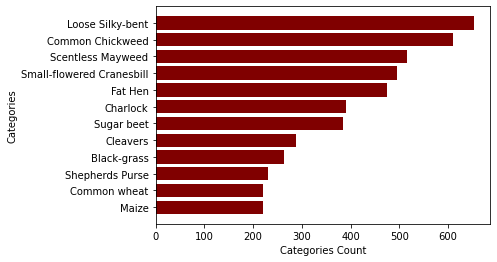

In [ ]:
classes_count_pd.sort_values('Count', inplace=True)
plt.barh(classes_count_pd['Class'], classes_count_pd['Count'], color = 'maroon')
plt.ylabel("Categories")
plt.xlabel("Categories Count")
plt.show()

[]

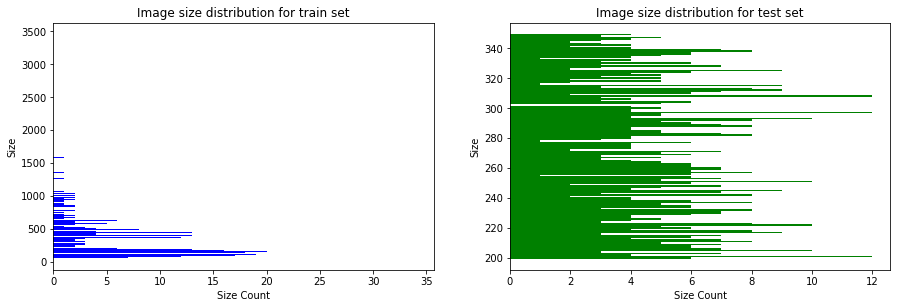

In [ ]:
fig = plt.figure(figsize=(15, 10))

fig.add_subplot(221)
image_size_train_pd.sort_values('Size', inplace=True)
plt.barh(image_size_train_pd['Size'], image_size_train_pd['Count'], color = 'blue')
plt.ylabel("Size")
plt.xlabel("Size Count")
plt.title("Image size distribution for train set")
plt.plot()

fig.add_subplot(222)
image_size_test_pd.sort_values('Size', inplace=True)
plt.barh(image_size_test_pd['Size'], image_size_test_pd['Count'], color = 'green')
plt.ylabel("Size")
plt.xlabel("Size Count")
plt.title("Image size distribution for test set")
plt.plot()

In [ ]:
loose_silky_bent_size_pd = pd.DataFrame(by_categories_size["Loose Silky-bent"], columns=['Height', 'Width'])
maize_size_pd = pd.DataFrame(by_categories_size["Maize"], columns=['Height', 'Width'])

[]

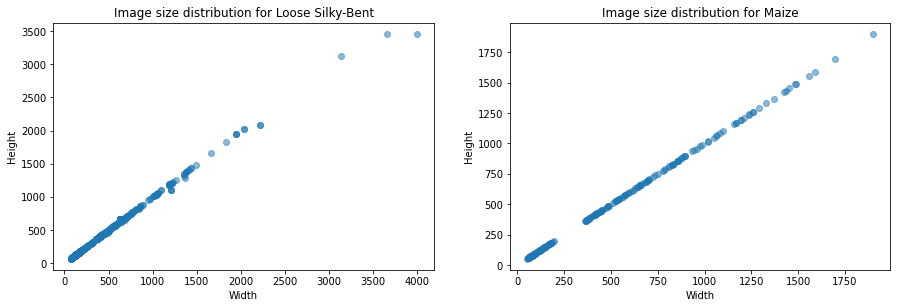

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221)
plt.scatter(loose_silky_bent_size_pd['Width'], loose_silky_bent_size_pd['Height'], alpha=0.5)
plt.ylabel("Height")
plt.xlabel("Width")
plt.title("Image size distribution for Loose Silky-Bent")
plt.plot()

fig.add_subplot(222)
plt.scatter(maize_size_pd['Width'], maize_size_pd['Height'], alpha=0.5)
plt.ylabel("Height")
plt.xlabel("Width")
plt.title("Image size distribution for Maize")
plt.plot()

Display Some Sample Images

In [ ]:
def display_images(class_name):
  fig, axes = plt.subplots(5, 5, figsize=(10, 10))

  count = 0
  for i in range(0, 5):
    for j in range(0, 5):
      axes[i, j].imshow(train_images[class_name][count])
      count += 1


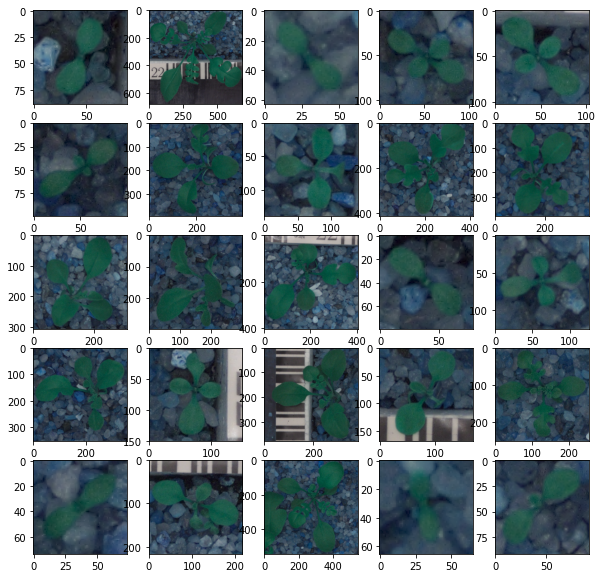

In [ ]:
display_images("Shepherds Purse")

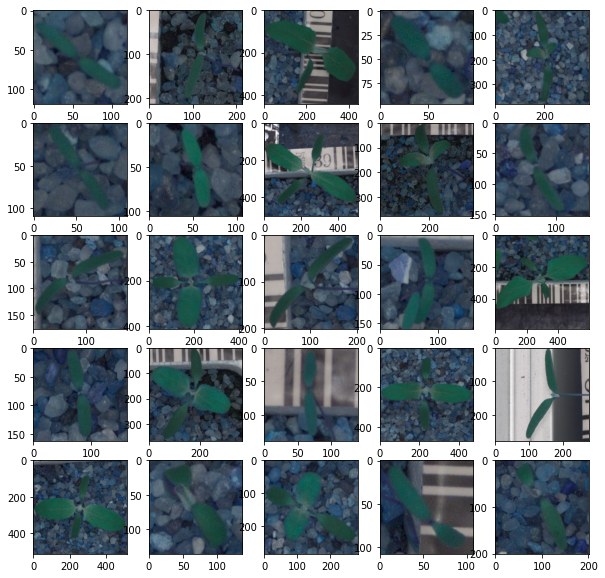

In [ ]:
display_images("Fat Hen")

BGR Histograms

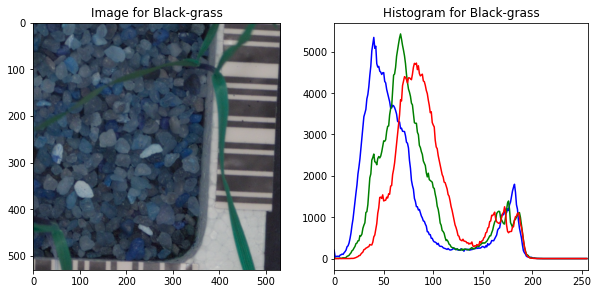

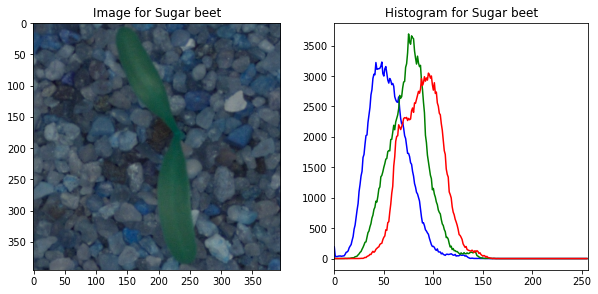

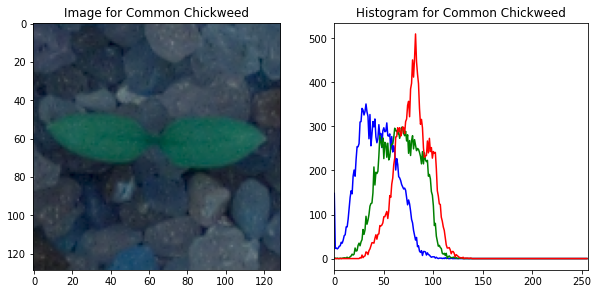

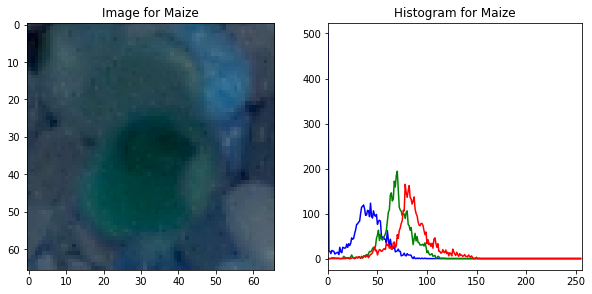

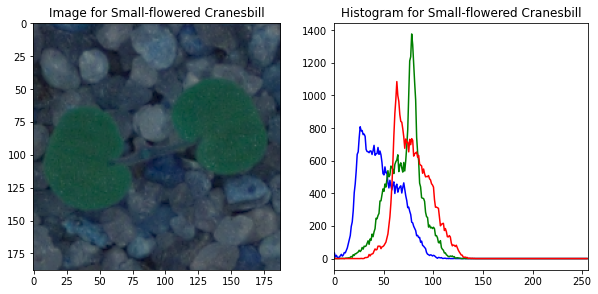

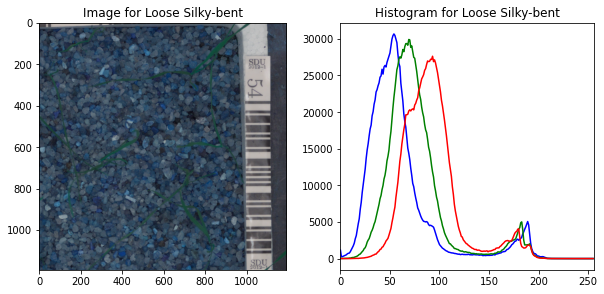

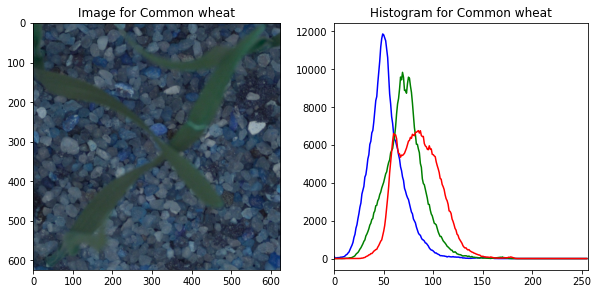

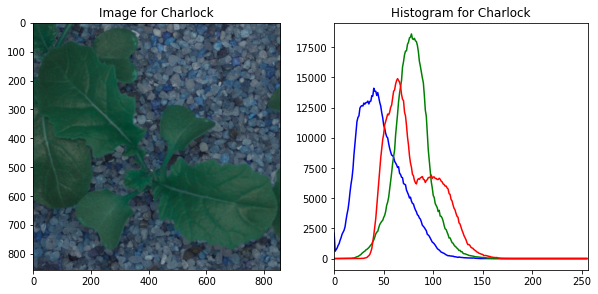

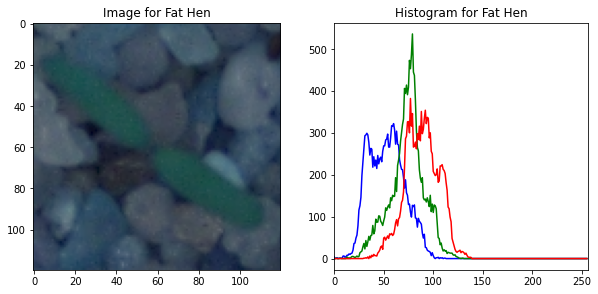

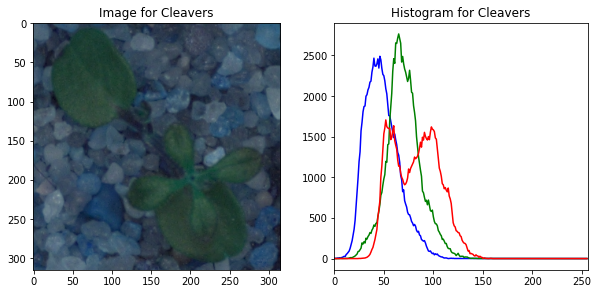

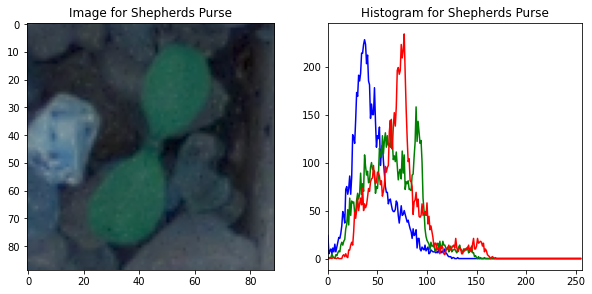

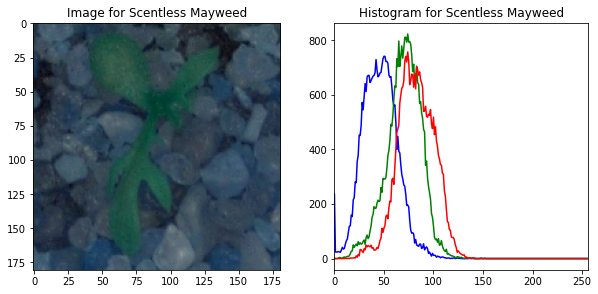

In [ ]:
def bgr_histograms(class_name):
    fig = plt.figure(figsize=(10, 10))

    img = train_images[class_name][0]
    color = ('b','g','r')

    fig.add_subplot(222)
    plt.title(f"Histogram for {class_name}")
    for i,col in enumerate(color):
      histr = cv2.calcHist([img],[i],None,[256],[0,256])
      plt.plot(histr,color = col)
      plt.xlim([0,256])

    fig.add_subplot(221)
    plt.title(f"Image for {class_name}")
    plt.imshow(img)

# plot bgr histogram for each class
for cls in train_images:
  bgr_histograms(cls)